In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()

X = iris["data"][:,(2,3)]
y = (iris['target']==2).astype(np.float64)

Text(0.5, 1.0, 'feature scatter')

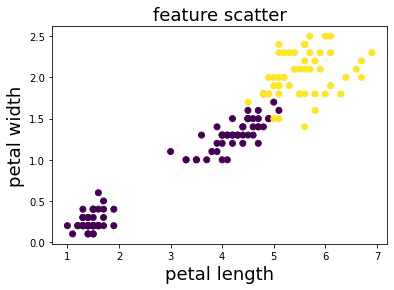

In [31]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("petal length", fontsize=18)
plt.ylabel("petal width", rotation=90, fontsize=18)
plt.title("feature scatter", fontsize=18)

In [32]:
from sklearn.pipeline import Pipeline

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=50000)),
])

In [33]:
svm_clf.fit(X, y)
print(svm_clf.named_steps["linear_svc"].coef_)
print(svm_clf.named_steps["linear_svc"].intercept_)

[[1.63342148 2.38807172]]
[-2.50533769]


In [34]:
svm_clf.predict([[3.8,1.7]])

array([0.])

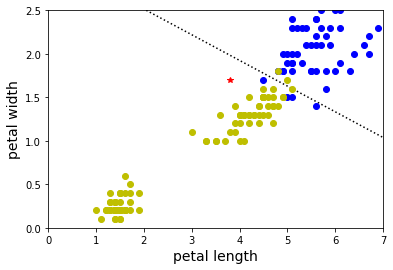

In [35]:
w=-svm_clf.named_steps["linear_svc"].coef_[0,0]/svm_clf.named_steps["linear_svc"].coef_[0,1]
b=-svm_clf.named_steps["linear_svc"].intercept_[0]/svm_clf.named_steps["linear_svc"].coef_[0,1]

line =svm_clf.named_steps["scaler"].inverse_transform([[-5, (-5*w)+b],[5,5*w+b]])

plt.figure()
plt.plot(line[:,0], line[:,1], 'k:', label="LinearSVC")
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bo', label="Iris-Virginica")
plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', label="Not-Virginica")
plt.plot(3.8, 1.7, "r*")

plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.axis([0,7,0,2.5])
plt.show()

In [41]:
#다항식 특성을 추가하여 분류

from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=50000)),
])

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', max_iter=50000))])

In [42]:
#커널 트릭
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=2, C=5)),
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=2, kernel='poly'))])

In [43]:
#가우시안 RBF 커널

rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001)),
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])